In [1]:
from exact_diag import form_basis, ham_op_2, quantum_operator, spinful_fermion_basis_1d, casimir_dict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
l = 6
L = 2*l
N = l
Nfs = []
for i in range(N+1):
    if N-i <= L and i <= L:
        Nfs += [(i, N-i)]
big_basis = spinful_fermion_basis_1d(2*l, Nf = Nfs)
k = np.arange(1, 2*l+1, 2)*0.5*np.pi/l

def Sz(L, h, basis):
    h_dict = {'static': [['n|', [[.5*h, i] for i in range(L)]],
                        ['|n', [[-.5*h, i] for i in range(L)]]]}
    h_op = quantum_operator(h_dict, basis=basis)
    return h_op
cops = []
for i in range(l):
    cops += [quantum_operator(casimir_dict(l, i, 1), basis=big_basis)]


Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [3]:
Gs = np.arange(0., 3.5, .5)/np.sum(k)
hs = np.arange(0., 2.5, .5)
mags_full = np.zeros((len(Gs), len(hs)))
mags_T = np.zeros((len(Gs), len(hs)))
Sz_op = Sz(L, 1, big_basis)
for i, G in enumerate(Gs):
    print('G/Gc = {}'.format(G*np.sum(k)))
    print('')
    H = ham_op_2(l, G, k, big_basis)
    Ht = ham_op_2(l, G, k, big_basis, couplings=(1,0,1))
    for j, h in enumerate(hs):
        print('h = {}'.format(h))
        h_op = Sz(L, h, big_basis)
        e, v = (H+h_op).eigsh(k=1, which='SA')
        print('Full Hamiltonian casimirs')
        for i, c in enumerate(cops):
            cas = c.matrix_ele(v[:,0], v[:,0])
            if np.abs(cas-3) > 10**-8:
                print('{}th weird casimir'.format(i))
                print(cas)
        mags_full[i, j] = Sz_op.matrix_ele(v[:,0], v[:,0])
        e, v = (Ht+h_op).eigsh(k=1, which='SA')
        print('Pairing only casimirs')
        for c in cops:
            cas = c.matrix_ele(v[:,0], v[:,0])
            if np.abs(cas-3) > 10**-8:
                print('{}th weird casimir'.format(i))
                print(cas)
        mags_T[i, j] = Sz_op.matrix_ele(v[:,0], v[:,0])

Hermiticity check passed!
Symmetry checks passed!
G/Gc = 0.0

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
h = 0.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
1th weird casimir
(1.4750617137142783-1.1102230246251565e-16j)


/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


Pairing only casimirs
5th weird casimir
(1.9279734244036617-3.1733077763975048e-34j)
h = 0.5
Hermiticity check passed!
Symmetry checks passed!


/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


Full Hamiltonian casimirs
Pairing only casimirs
h = 1.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 1.5
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 2.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
G/Gc = 0.5

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
h = 0.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 0.5
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 1.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 1.5
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only casimirs
h = 2.0
Hermiticity check passed!
Symmetry checks passed!
Full Hamiltonian casimirs
Pairing only c

In [4]:
import seaborn as sns

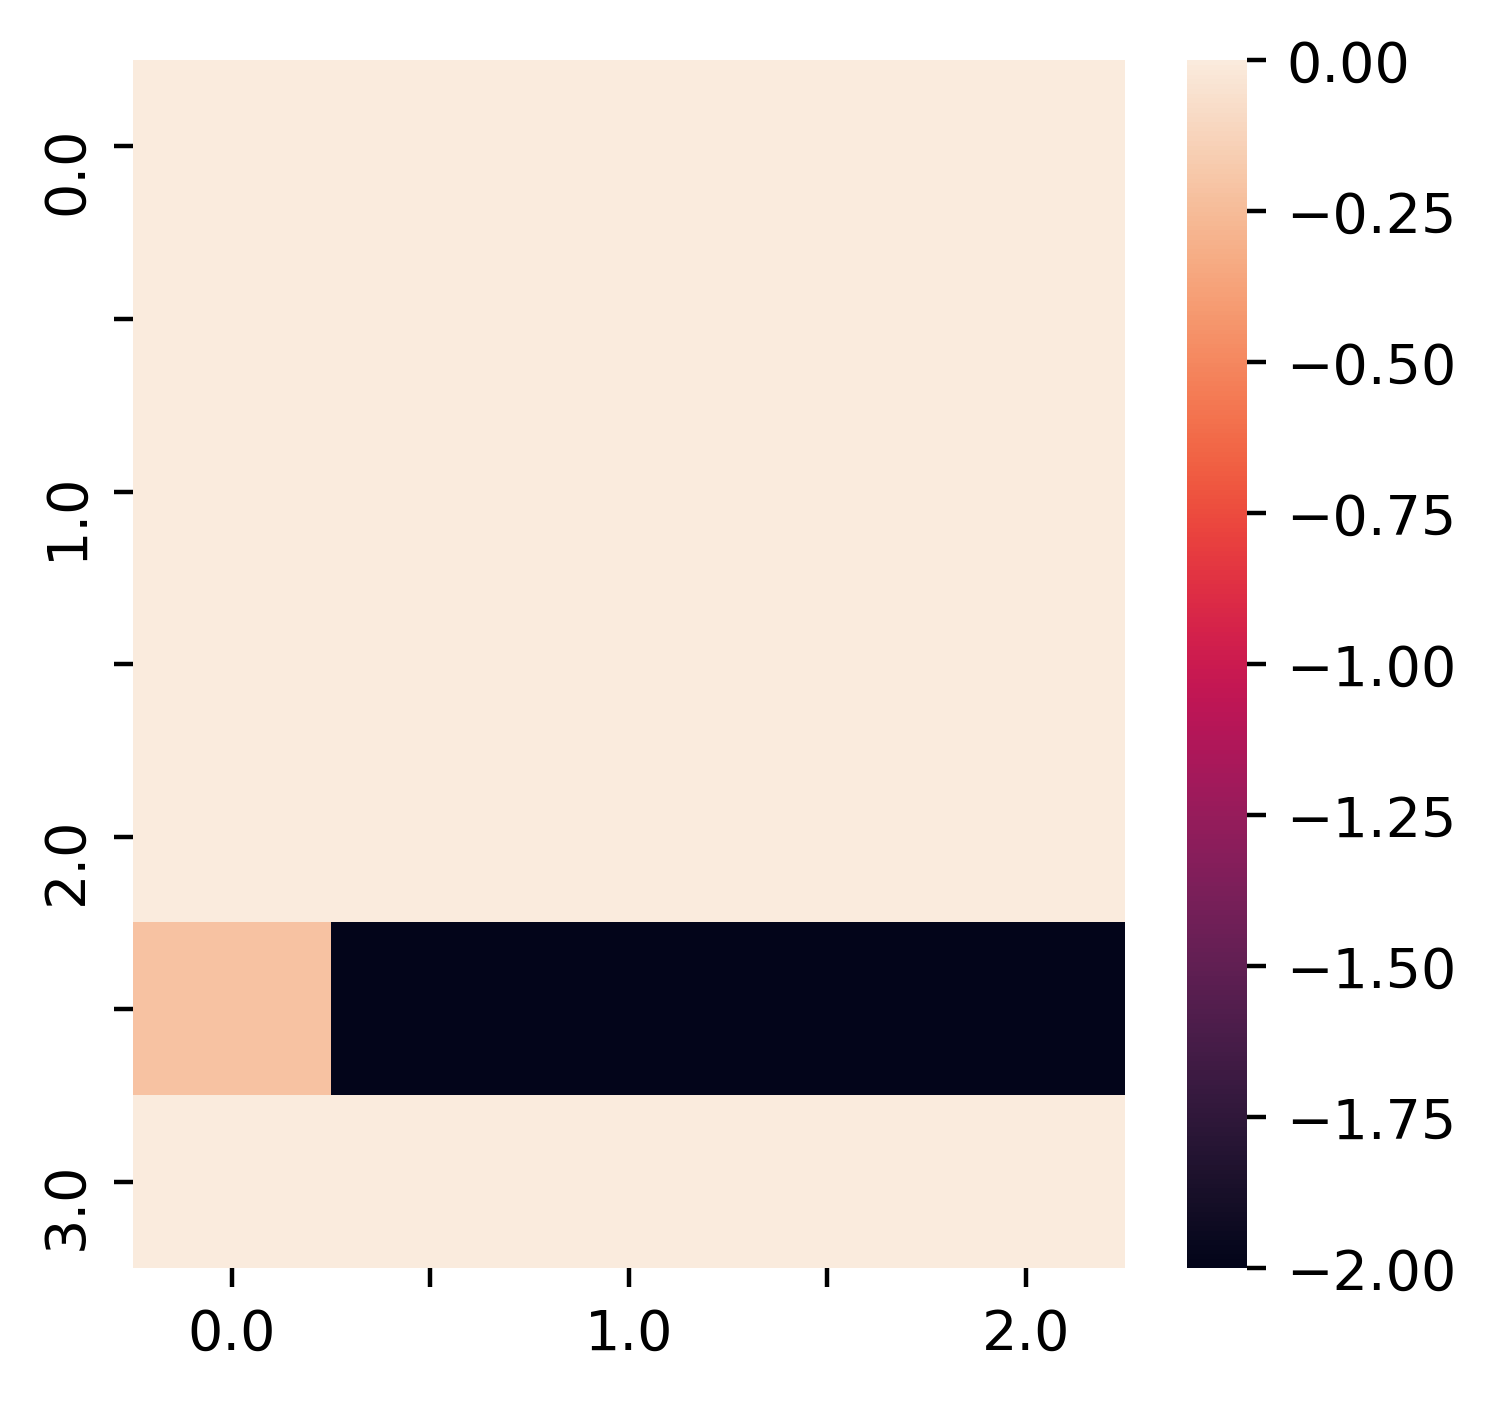

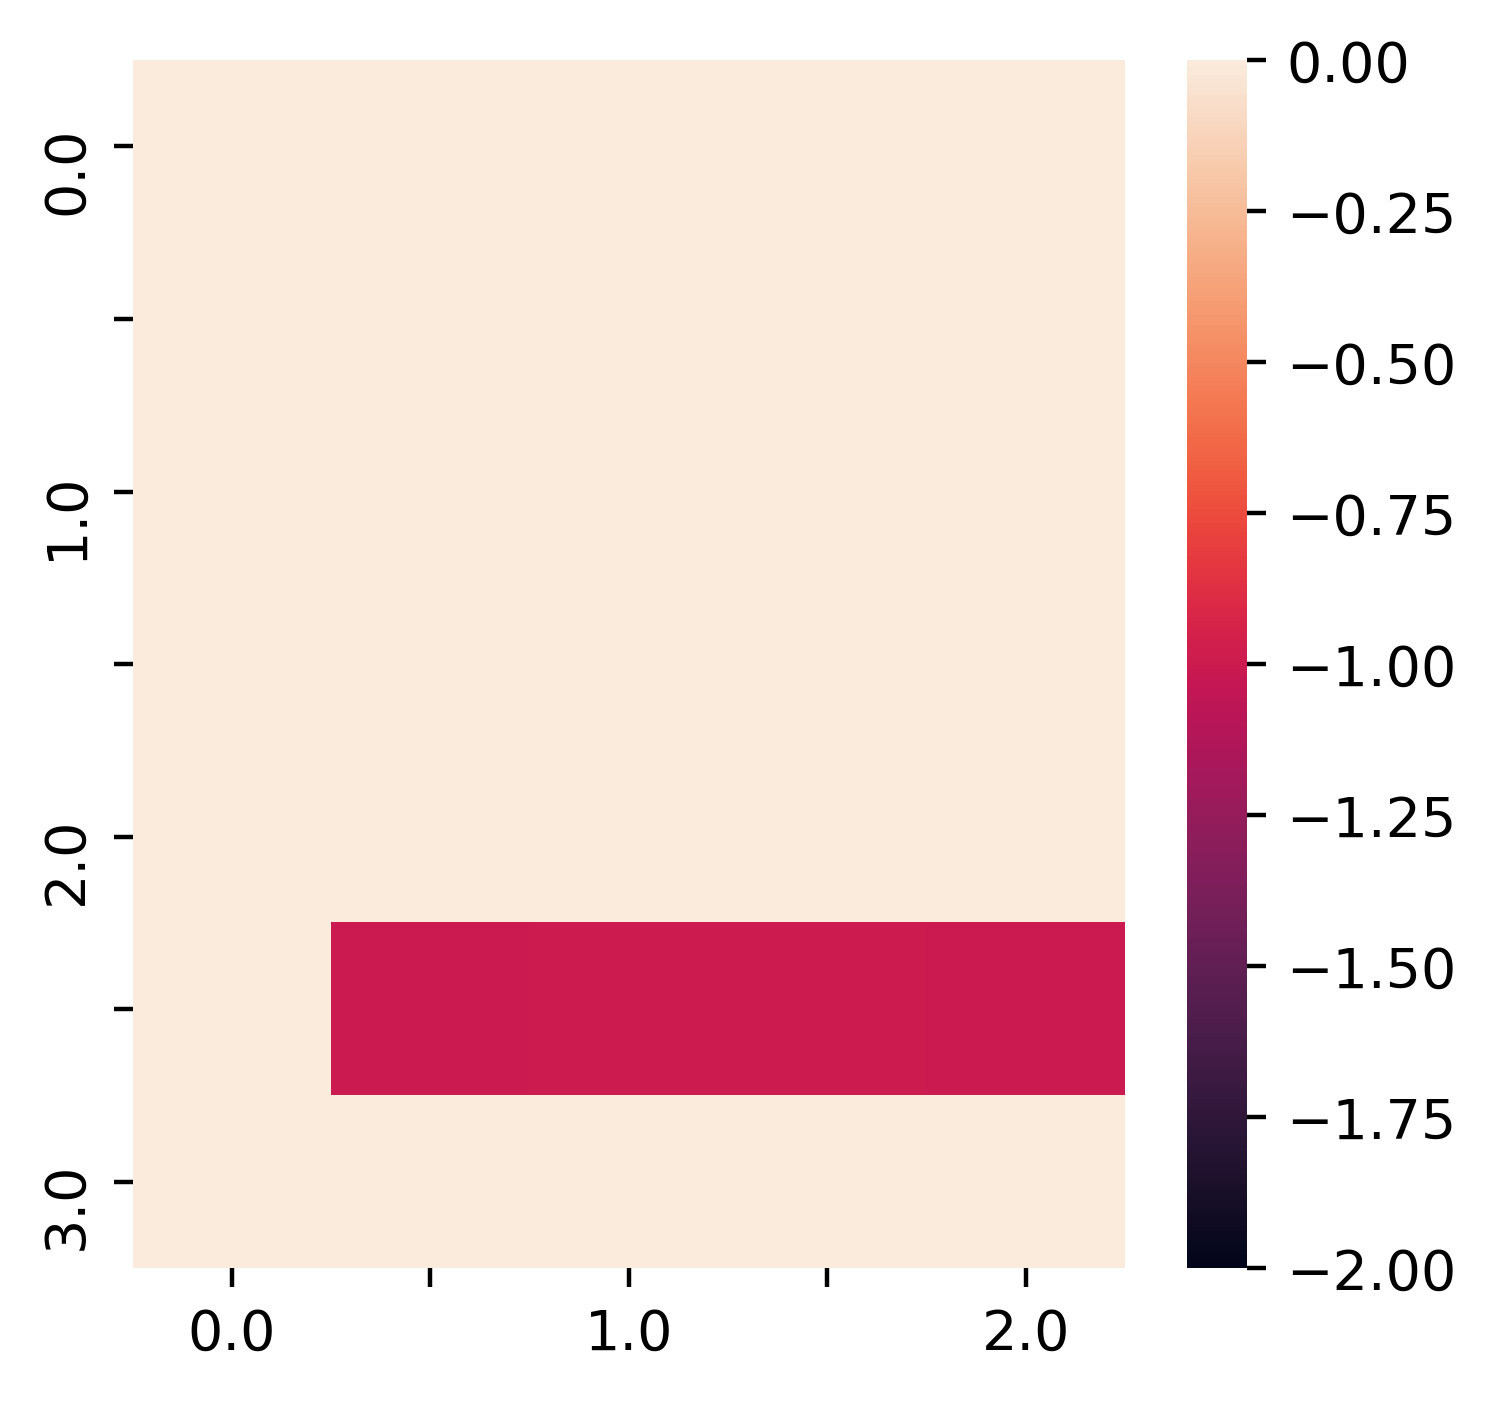

In [5]:
xlabels = [np.round(h, 1) for h in hs]
for i in range(len(xlabels)):
    if (i+1)%2 == 0:
        xlabels[i] = None
ylabels = [np.round(G*np.sum(k), 1) for G in Gs]
for i in range(len(ylabels)):
    if (i+1)%2 == 0:
        ylabels[i] = None
plt.figure(figsize=(4,4), dpi=400)
plot = sns.heatmap(mags_full, xticklabels=xlabels, yticklabels=ylabels, vmin=-2, vmax=0)
plt.show()
plt.figure(figsize=(4,4), dpi=400)
sns.heatmap(mags_T, xticklabels=xlabels, yticklabels=ylabels, vmin=-2, vmax=0)
plt.show()